# Objectives

1. Implement the algorithms listed below in a programming language (python)
2. Establish the properties of the input data against which the analysis is performed
3. Choose metrics for comparing algorithms
4. Perform empirical analysis of the proposed algorithms
5. Make a graphical presentation of the data obtained
6. Make a conclusion on the work done

### Algorithms

BFS, DFS


## Implementation


## Setup


In [90]:
from decorators import *
from benchmarking import *
import sys
import matplotlib.pyplot as plt

sys.path.append('../shared')


### Generating the graphs


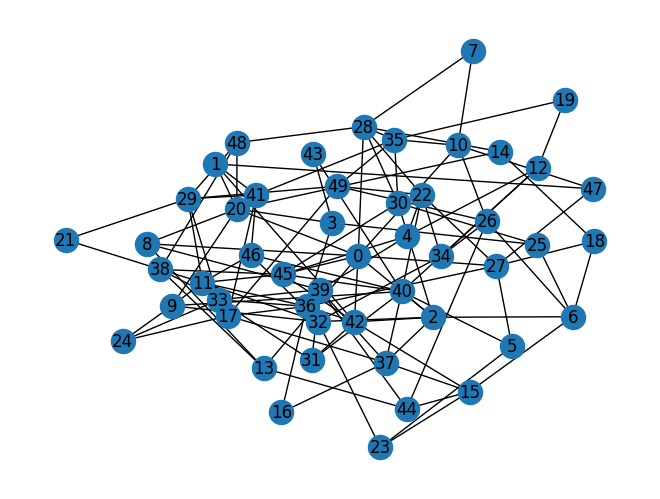

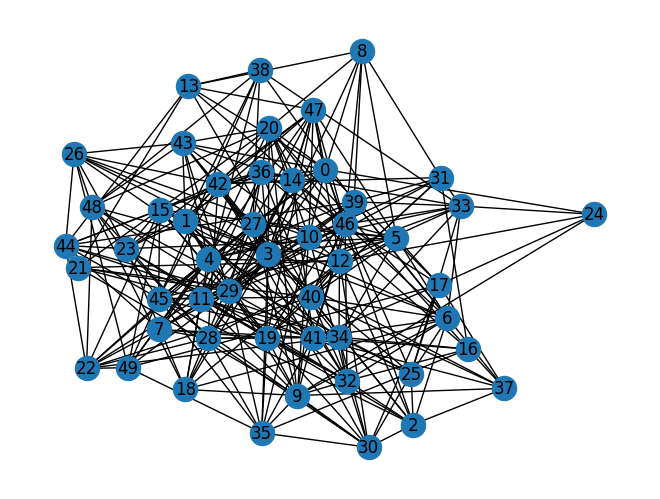

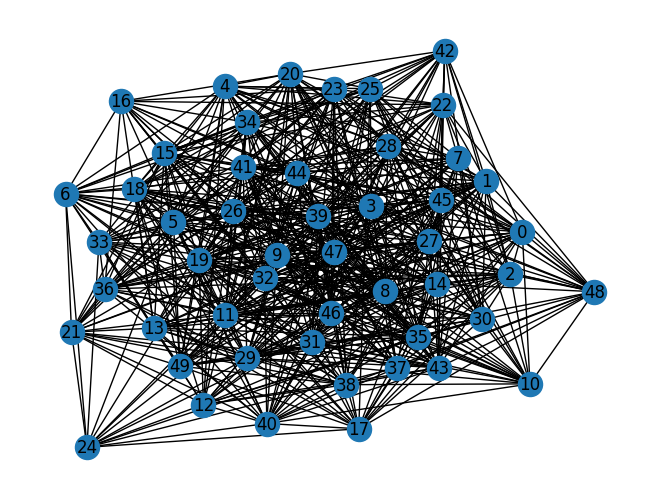

In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import random
N = 50  # number of nodes in each graph
SEED = 42

rand = random.Random(SEED)

sparse_graph = nx.gnp_random_graph(N, 0.1, SEED)
medium_graph = nx.gnp_random_graph(N, 0.25, SEED)
dense_graph = nx.gnp_random_graph(N, 0.5, SEED)

# set edge weights between 1 and 20

for G in [sparse_graph, medium_graph, dense_graph]:
    for u, v in G.edges():
        G[u][v]['weight'] = rand.randint(1, 20)

plt.figure()
nx.draw(sparse_graph, with_labels=True)
plt.show()

plt.figure()
nx.draw(medium_graph, with_labels=True)
plt.show()

plt.figure()
nx.draw(dense_graph, with_labels=True)
plt.show()


### 1. Implement the algorithms listed below in a programming language (python)


The following implementations find any path from node A to node B. Giving edges weight was not a requirement and was made for prettier graphs. Recursion will not be used, to avoid bottlenecks from function calls.


In [92]:
def bfs_path(G, start, goal):
    queue = [(start, [start])]
    while queue:
        (node, path) = queue.pop(0)
        for next_node in G[node]:
            if next_node not in path:
                if next_node == goal:
                    return path + [next_node]
                else:
                    queue.append((next_node, path + [next_node]))


def dfs_path(G, start, goal):
    stack = [(start, [start])]
    while stack:
        (node, path) = stack.pop()
        for next_node in G[node]:
            if next_node not in path:
                if next_node == goal:
                    return path + [next_node]
                else:
                    stack.append((next_node, path + [next_node]))


### 2. Establish the properties of the input data against which the analysis is performed

The inputs are going to be the graphs defined in the previous section. The algorithm is going to be run on them with 3 sets of points and the resulting time is going to be the sum.


In [93]:
dataset = [sparse_graph, medium_graph, dense_graph]
FROM = [0, 13, 42]
TO = [49, 35, 7]


def test_bfs(graph):
    return [bfs_path(graph, FROM[i], TO[i]) for i in range(len(FROM))]


def test_dfs(graph):
    return [dfs_path(graph, FROM[i], TO[i]) for i in range(len(FROM))]


algorithms = [test_bfs, test_dfs]


### 3. Choose metrics for comparing algorithms

The metric that will be used for comparing the algorithms is running time.


### 4. Perform empirical analysis of the proposed algorithms

The utility functions defined in the previous laboratories will be used to benchmark the running time of the algorithms.


In [94]:
results = benchmark_single_thread(algorithms, dataset)


In [95]:
# print table
import pandas as pd
columns = ['sparse', 'medium', 'dense']
df = pd.DataFrame(results.values(), index=results.keys(),
                  columns=columns)
print(df)


          sparse  medium   dense
test_bfs  0.1521  0.1480  0.1529
test_dfs  0.1730  0.0997  0.0433


### 5. Make a graphical presentation of the data obtained

The following chart show the running time of each algorithm on the chosen graphs.

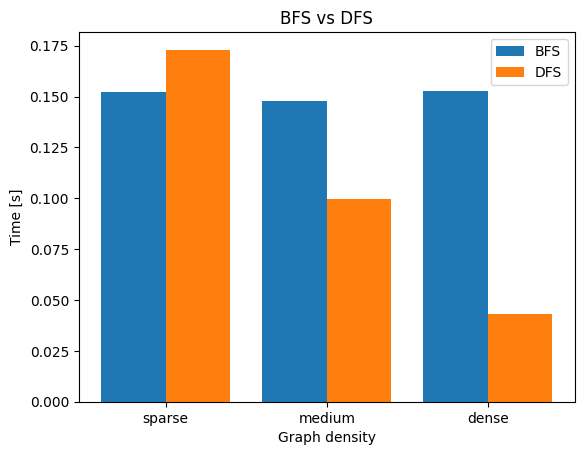

In [96]:
import numpy as np

y_bfs = results['test_bfs']
y_dfs = results['test_dfs']

x_axis = np.linspace(0, 2, 3)

plt.bar(x_axis - 0.2, y_bfs, width=0.4, label='BFS')
plt.bar(x_axis + 0.2, y_dfs, width=0.4, label='DFS')
plt.xticks(x_axis, columns)
plt.xlabel('Graph density')
plt.ylabel('Time [s]')
plt.title('BFS vs DFS')
plt.legend()
plt.show()

The rest of the source code can be accessed publicly on GitHub: [https://github.com/prenaissance](https://github.com/prenaissance) 

# Conclusion

In this laboratory work, I compared the efficiency of 2 graph traveral algorithms for the use case of finding a particular node in a graph, by analyzing the time of execution and showing the results graphically.

The choice between Breadth-First Search (BFS) and Depth-First Search (DFS) for finding a node in a graph by execution time depends on the specific characteristics of the graph and the search requirements.

BFS is generally faster than DFS in finding a node in a graph when the graph has a larger branching factor or the node is located closer to the root node. In contrast, DFS is faster when the graph has a smaller branching factor or the node is located deeper in the graph.

Furthermore, BFS guarantees the shortest path to the target node (only when the graph is unweighted), while DFS does not guarantee the shortest path and may traverse longer paths before finding the target node. This makes BFS more suitable for search problems that require the shortest path, such as pathfinding algorithms in mapping applications.

Overall, the choice between BFS and DFS for finding a node in a graph by execution time requires careful consideration of the graph's characteristics and the specific requirements of the search problem. The optimal choice can lead to significant performance improvements and better search results. In the results shown by the measurement of execution time, BFS was faster than DFS in even moderately sparse graphs, but that is not always the case, especially when graphs are extremely big in amount of nodes.